INF200 Lecture No 4
===================

***Hans Ekkehard Plesser, NMBU, 4 October 2021***

# Today's topics

* About INF200 *Advanced Programming*
* Administrativa
    - Choosing your project partner and a block
    - Getting started with Git
    - Guest lecture 11 Oct
    - Tech assistance
* Representing data
    - Overview
    - Standard containers: Lists, dictionaries, sets
    - More advanced container techniques
    - NumPy arrays
    - Pandas series and dataframes

---

# About INF200 *Advanced Programming*

# Administrativa

## Choosing your project partner and a block

- Fill in the [quiz on Canvas](https://nmbu.instructure.com/courses/7165/quizzes/10047) by **Friday, 8 Oct, 18.00**!
- Selection of block
    - There will be more places in the January block than in the June block (approx 120 vs 60 places).
    - If you cannot participate in one of the blocks for a good reason, you will have priority for a space in the other block.
    - A good reason is primarily a "colliding" mandatory course in one of the blocks or studies abroad.
    - Attendance **on campus** is **mandatory** during most of the block, **Mon–Fri from 9–15**.
    - January block
        - Mandatory attendance: 3 January–18 January
        - Presentation preparation: 19/20/21 January
        - Exam: 24/25 January (small probability for exams 24/25 Jan + 31 Jan/1 Feb)
    - June block
        - Mandatory attendance: 30 May–15 June (except 6 June, public holiday)
        - Presentation preparation: 16/17 June
        - Exam: 20/21 June
- Selection of partner
    - You must collaborate with a partner.
    - You and your partner **must be in the same block**.
    - You and your partner should be in the same exercise group.
    - Change of partner will only be permitted under extraordinary circumstances.

## Getting started with GitLab

- From week 41 onward, we will use a version control system to manage course materials and exercise delivery.
- You must create a GitLab account on https://about.gitlab.com/ by Friday 8 Oct.
    - Register with your NMBU email address!
    - Configure 2-factor authenication!
    - Do this during the exercise groups this week!
- You will practice working with GitLab and Git in the exercise groups next week (13–15 Oct).

## Guest lecture next week

On Monday, 11 October, Oliver Tomic will lecture on Python tools for machine learning.

## Tech assistance

Sanjay is available in TF2-325B *Thursdays 10–11* for help with technical problems (https://link.mazemap.com/V5Lvu0nK).

---
# Representing data: Overview

- We need to organize data in our code to work with it
    - Keep control: is that value the temperature at noon or the wind speed at midnight?
    - Select data according to different criteria: by name, by location, ...
    - Exchange data between different parts of a large program
    - Perform operations efficiently on large data
- Keeping control is essential
    - If we lose control of what is what, our code will produce incorrect results
    - Wrong results are worse than no results: if the program crashes, we at least know something is wrong!
- Code lives long and passes through many hands
    - Code should be self-documenting
    - Data should be self-documenting
    - Example: Wheather data from frost.met.no

        ```python
          [{'sourceId': 'SN17850:0',
            'referenceTime': '2021-01-01T00:00:00.000Z',
            'observations': [{'elementId': 'mean(air_temperature P1D)',
                              'value': -0.3,
                              'unit': 'degC',
                              'level': {'levelType': 'height_above_ground', 'unit': 'm', 'value': 2},
                              'timeOffset': 'PT0H',
                              'timeResolution': 'P1D',
                              'timeSeriesId': 0,
                              'performanceCategory': 'C',
                              'exposureCategory': '1',
                              'qualityCode': 0},
        ```
                          
- In this lecture
    - Standard containers for data: lists, dictionaries, sets
    - NumPy arrays
    - Pandas dataframes
- Weeks 42–43
    - Object-oriented programming as a technique for consistent representation of and operations on data

---
# Standard containers: Lists, dictionaries, sets

- We often need to process *collections* of data
    - students in a class
    - series of weather measurements
    - payments in a shop
- Frequently, several items of information are related
    - name, courses taken, grades achieved of a student
    - temperature, humidity, precipitation, wind speed at a given hour
    - items, quantities and prices of goods purchased
- The number of data items we have will change ove time
    - we cannot work with fixed variables, e.g.,
      ```python
      inf200_student1_name = 'Karim'
      inf200_student2_name = 'Elise'
      ...
      inf200_student169_name = 'Ole'
      ```
    - we need flexible *containers*
- General properties of containers
    - We can insert data
    - We can remove data
    - We can access data
    - We can query if an item is in a container
- These general properties apply not only to containers in Python, but also in other programming languages
- Different containers have different specific properties

## The Python list

- The only container you *really* need
    - Everything else can *in principle* be implemented using lists
    - Performance could suffer badly, though; an example follows below
- Python's `list` is a *[random access](https://en.wikipedia.org/wiki/Random_access) container*
    - We can ask for any element in a list—and get it fast.
    - This differs from the meaning of "[list](https://en.wikipedia.org/wiki/List_(abstract_data_type))" in computer science, where it means a sequential container, where we only can move from one element to the next.

### Python list as random access container
- Insert data anywhere in a list

In [1]:
l = [10, 20, 30, 40]
l.append(50)     # at end
l.insert(3, 35)  # before element with index 3
l.insert(0, 5)   # at beginning
print(l)

[5, 10, 20, 30, 35, 40, 50]


- Access and change data

In [2]:
l[4] = 300
l

[5, 10, 20, 30, 300, 40, 50]

- Remove data

In [3]:
del l[4]
l

[5, 10, 20, 30, 40, 50]

- Ask if a value is in a list

In [4]:
20 in l

True

In [5]:
l.index(30)

3

In [6]:
l.index(99)

ValueError: 99 is not in list

### Building lists

#### ... the old fashioned way using a loop

In [7]:
x = []
for n in range(5):
    x.append(n)
x

[0, 1, 2, 3, 4]

- Works, but quite a lot of code
- We write down instructions of how to build the list step by step

#### ... the modern way by [list comprehension](https://en.wikipedia.org/wiki/List_comprehension)

In [8]:
x = [n for n in range(5)]
x

[0, 1, 2, 3, 4]

- Much more compact
- We express our *intent*: what do we want in the list
- We can also perform operations and place conditions on which elements to include

In [9]:
y = [n**3 for n in range(10) if n % 3 == 0]
y

[0, 27, 216, 729]

- This is very close to the mathematical [set-builder notation](https://en.wikipedia.org/wiki/Set-builder_notation)
$$y = \{n^3|0\leq n< 10 \wedge n=0\bmod 3\}$$

#### Building a chessboard

- A chessboard has files (columns) a–h and ranks (rows) 1–8
- Can we generate a list of all column-row combinations from a1 to h8?
- We can use a nested list comprehension

![Chessboard, Wikipedia](https://upload.wikimedia.org/wikipedia/commons/thumb/c/c3/Chess_board_opening_staunton.jpg/300px-Chess_board_opening_staunton.jpg) ![Odometer, Wikipedia](https://upload.wikimedia.org/wikipedia/commons/thumb/7/7d/Odometer2.jpg/250px-Odometer2.jpg)
Source: Wikipedia

In [10]:
chessboard = [chr(ord('a')+file) + str(1+rank) 
              for file in range(8) for rank in range(8)]
print(chessboard)

['a1', 'a2', 'a3', 'a4', 'a5', 'a6', 'a7', 'a8', 'b1', 'b2', 'b3', 'b4', 'b5', 'b6', 'b7', 'b8', 'c1', 'c2', 'c3', 'c4', 'c5', 'c6', 'c7', 'c8', 'd1', 'd2', 'd3', 'd4', 'd5', 'd6', 'd7', 'd8', 'e1', 'e2', 'e3', 'e4', 'e5', 'e6', 'e7', 'e8', 'f1', 'f2', 'f3', 'f4', 'f5', 'f6', 'f7', 'f8', 'g1', 'g2', 'g3', 'g4', 'g5', 'g6', 'g7', 'g8', 'h1', 'h2', 'h3', 'h4', 'h5', 'h6', 'h7', 'h8']


- How does this list comprehension work?
    - The last loop (over `rank`) runs fastest (like the digits on an odometer (tripteller)
    - Every time the `rank`-loop has run through, the `file` loop makes one step
    - We exploit that the capital letters have ordered character codes
        - `ord('a')` gives us the code for a
        - we add 0, 1, ..., 7
        - `chr()` converts the resulting number to a letter
- Can we create a list comprehension to get only the black fields, given that a1 is black?
    - Inspecting the board shows that rank plus file number of black fields is even

In [11]:
chess_black = [chr(ord('a')+file) + str(1+rank) 
               for file in range(8) for rank in range(8)
               if (file + rank) % 2 == 0]
print(chess_black)

['a1', 'a3', 'a5', 'a7', 'b2', 'b4', 'b6', 'b8', 'c1', 'c3', 'c5', 'c7', 'd2', 'd4', 'd6', 'd8', 'e1', 'e3', 'e5', 'e7', 'f2', 'f4', 'f6', 'f8', 'g1', 'g3', 'g5', 'g7', 'h2', 'h4', 'h6', 'h8']


### Simple list operations

#### Iterating forward

In [12]:
l = [11, 22, 33, 44]
for n in l:
    print(n, end=' ')

11 22 33 44 

#### Iterating backwards

In [14]:
for n in reversed(l):
    print(n, end=' ')

44 33 22 11 

#### Iterating with counter

In [15]:
for counter, n in enumerate(l):
    print(f'{counter}:{n}', end=' ')

0:11 1:22 2:33 3:44 

- The examples above show good Python style for working with elements of a list.
    - **Avoid** C-style iteration such as

      ```python
      for i in range(len(l)):
          print(l[i])

      ```
    - That looks like Python spoken with a very heavy accent!

#### Slicing

- Just some examples, experiment yourself!

In [16]:
l[:]

[11, 22, 33, 44]

In [17]:
l[2:]

[33, 44]

In [18]:
l[:2]

[11, 22]

In [19]:
l[::2]

[11, 33]

In [20]:
l[:-1]

[11, 22, 33]

### Lists of lists

- Python lists can *in principle* contain anything, in arbitrary mixture

In [19]:
[1, 5.4, 'a string', ['a list'], {'a': 1}]

[1, 5.4, 'a string', ['a list'], {'a': 1}]

- *In practice*, this is not a good idea and points to a lack of control
- Usually, we want elements of the same type in a list (there are exceptions)
- But lists can contain lists, e.g., student data

In [21]:
students = [['Per', 'Olsen', 'M-DV', ['INF200', 'INF221', 'INF250']],
            ['Kari', 'Hansen', 'M-TDV', ['DAT300', 'DAT390', 'FYS388']]]
students

[['Per', 'Olsen', 'M-DV', ['INF200', 'INF221', 'INF250']],
 ['Kari', 'Hansen', 'M-TDV', ['DAT300', 'DAT390', 'FYS388']]]

- We need to index one level at a time

In [22]:
students[0][1]

'Olsen'

In [23]:
students[1][3][1]

'DAT390'

### Copying lists: beware!

- Assignment only gives a new name, does not copy

In [24]:
l = [11, 22, 33, 44]
m = l
l[2] = 0
print(l)
print(m)

[11, 22, 0, 44]
[11, 22, 0, 44]


- Two ways of creating a copy

In [25]:
l = [11, 22, 33, 44]
m = l.copy()
k = l[:]
l[2] = 0
print(l)
print(m)
print(k)

[11, 22, 0, 44]
[11, 22, 33, 44]
[11, 22, 33, 44]


- But beware of nested lists!
- `copy()` and `[:]` create a *shallow* copy!

In [26]:
l = [11, [22, 33], 44]
m = l.copy()
l[0] = 0
l[1][0] = 999
print(l)
print(m)

[0, [999, 33], 44]
[11, [999, 33], 44]


- Notice that the change to the inner list has affected `m` as well!
- We need to `deepcopy()` is we want also included lists copied

In [27]:
from copy import deepcopy
l = [11, [22, 33], 44]
m = deepcopy(l)
l[0] = 0
l[1][0] = 999
print(l)
print(m)

[0, [999, 33], 44]
[11, [22, 33], 44]


## Python dictionaries

- What is problematic with storing student data like this?

In [27]:
students = [['Per', 'Olsen', 'M-DV', ['INF200', 'INF221', 'INF250']],
            ['Kari', 'Hansen', 'M-TDV', ['DAT300', 'DAT390', 'FYS388']]]

- To print student names, we would write code such as

In [28]:
for student in students:
    print(student[1])

Olsen
Hansen


- How long will we remember that `0` indexes the first and `1` the last name?
- Will our colleague coding other parts of the problem know?
- What happens if we want to make changes to the code, add new information?
- We need a more robust solution: *dictionaries*
- Also known as [*associative arrays*](https://en.wikipedia.org/wiki/Associative_array) or *maps*
- Map or associate *keys* to *values*
    - Keys must be unique
    - Keys must be *immutable* (in Python): no lists or dicts as keys (use tuples!)
    - Look-up by key is fast

In [29]:
students = [{'given_name': 'Per', 'family_name': 'Olsen', 'programme': 'M-DV', 
             'courses': ['INF200', 'INF221', 'INF250']},
            {'given_name': 'Kari', 'family_name': 'Hansen', 'programme': 'M-TDV', 
             'courses': ['DAT300', 'DAT390', 'FYS388']}]
students

[{'given_name': 'Per',
  'family_name': 'Olsen',
  'programme': 'M-DV',
  'courses': ['INF200', 'INF221', 'INF250']},
 {'given_name': 'Kari',
  'family_name': 'Hansen',
  'programme': 'M-TDV',
  'courses': ['DAT300', 'DAT390', 'FYS388']}]

- The data is now largely self-documenting.
- In code working on the data, it becomes explicit what we are doing

In [30]:
for student in students:
    print(student['family_name'])

Olsen
Hansen


### Records and fields

- Our student data contains one [record](https://en.wikipedia.org/wiki/Record_(computer_science)) per student.
    - A record comprises information about an entity, e.g., one student.
    - If we had student data in a spreasheet, a record would usually be a row.
    - Standard databases also store records in rows.
    - If we used cardboard cards, we would have one card per student as record.
- Each record has one or more [fields](https://en.wikipedia.org/wiki/Field_(computer_science))
    - A field contains a single piece of information, e.g., family name, phone number, etc.
    - In a spreadsheet or database, fields correspond to columns.
    - On a cardboard card, for each field we would have a box to fill in the data.
- When representing students as a list of dictionaries
    - each dictionary is the record for one student, and
    - dictionary entries map field names to field entries.

### Design question: List of dicts or dicts of dicts?

#### Alternative A: List of records

In [19]:
students = [{'given_name': 'Per', 'family_name': 'Olsen', 'programme': 'M-DV', 
             'courses': ['INF200', 'INF221', 'INF250']},
            {'given_name': 'Kari', 'family_name': 'Hansen', 'programme': 'M-TDV', 
             'courses': ['DAT300', 'DAT390', 'FYS388']}]

#### Alternative B: Mapping family names to data

In [32]:
students_by_fam = {'Olsen': {'given_name': 'Per', 'programme': 'M-DV', 
                             'courses': ['INF200', 'INF221', 'INF250']},
                   'Hansen': {'given_name': 'Kari', 'programme': 'M-TDV', 
                              'courses': ['DAT300', 'DAT390', 'FYS388']}}

#### Alternative C: Mapping family and given name to data

In [33]:
students_by_name = {('Olsen', 'Per'): {'programme': 'M-DV', 
                                       'courses': ['INF200', 'INF221', 'INF250']},
                    ('Hansen', 'Kari'): {'programme': 'M-TDV', 
                                         'courses': ['DAT300', 'DAT390', 'FYS388']}}

#### Evaluation of alternatives

- Are there principal (will not work!) problems with some alternatives?
- Do some alternatives contain more or less information than others?
- Do they provide more or less flexibility?
- Do they provide advantages?

### Dictionary details

#### Building dictionaries by comprehension

- Dictionaries can also be built by comprehension
- We must supply key an value

In [31]:
odd_squares = {n: n**2 for n in range(10) if n % 2 == 1}
odd_squares

{1: 1, 3: 9, 5: 25, 7: 49, 9: 81}

#### Iterating over dictionaries

- Just over the keys

In [32]:
for key in odd_squares:
    print(key, end=' ')

1 3 5 7 9 

- Just over values

In [33]:
for val in odd_squares.values():
    print(val, end=' ')

1 9 25 49 81 

- Over key-value pairs
- We unpack the pairs immediately

In [34]:
for key, val in odd_squares.items():
    print(f'{key}^2 = {val}', end='  ')

1^2 = 1  3^2 = 9  5^2 = 25  7^2 = 49  9^2 = 81  

In [35]:
for ctr, (key, val) in enumerate(odd_squares.items()):   # ctr, (k, v)
    print(f'{ctr}:{key}^2 = {val}', end='  ')

0:1^2 = 1  1:3^2 = 9  2:5^2 = 25  3:7^2 = 49  4:9^2 = 81  

#### Turning a dictionary around

- Make values keys and keys values
- Works only if values are unique and immutable

In [36]:
odd_squares

{1: 1, 3: 9, 5: 25, 7: 49, 9: 81}

In [37]:
odd_roots = {val: key for key, val in odd_squares.items()}
odd_roots

{1: 1, 9: 3, 25: 5, 49: 7, 81: 9}

In [39]:
rem = {n: n % 3 for n in range(10)}
rem

{0: 0, 1: 1, 2: 2, 3: 0, 4: 1, 5: 2, 6: 0, 7: 1, 8: 2, 9: 0}

In [41]:
num = {val: key for key, val in rem.items()}
num

{0: 9, 1: 7, 2: 8}

##### Criticism
- What happens if we have duplicate values?
- How can we detect this problem?

#### Finding entries: dictionaries vs lists

- Finding *keys* in a dictionary is *much* faster than finding entries in a list
- The difference grows with container size
- Finding dictionary values is no faster than finding list values
- We *benchmark* by searching for a value not in the container
- `%timeit` is an *IPython magic*
    - only works in IPython and Jupyter, it is not Python code
    - runs everything that follows on the line, taking time with a stopwatch
    - repeats the timing several times to get statistics on fluctuations
    - to ensure reasonably accurate timing, it executes (loops) the command many times until runtime is at least 0.2s
    - For more, see online documentation: `%timeit?`

In [39]:
N = 10**2
l = list(range(N))
d = {n: n for n in l}

print(f'Timing list (N={N})')
%timeit (-1 in l)

print(f'Timing dict (N={N})')
%timeit (-1 in d)

Timing list (N=100)
837 ns ± 8.04 ns per loop (mean ± std. dev. of 7 runs, 1000000 loops each)
fTiming dict (N={N})
35.2 ns ± 2.44 ns per loop (mean ± std. dev. of 7 runs, 10000000 loops each)


In [40]:
N = 10**4
l = list(range(N))
d = {n: n for n in l}

print(f'Timing list (N={N})')
%timeit (-1 in l)
print(f'Timing dict (N={N})')
%timeit (-1 in d)

Timing list (N=10000)
83.6 µs ± 1.79 µs per loop (mean ± std. dev. of 7 runs, 10000 loops each)
Timing dict (N=10000)
30.6 ns ± 1.4 ns per loop (mean ± std. dev. of 7 runs, 10000000 loops each)


In [41]:
N = 10**6
l = list(range(N))
d = {n: n for n in l}
print(f'Timing list (N={N})')
%timeit (-1 in l)
print(f'Timing dict (N={N})')
%timeit (-1 in d)

Timing list (N=1000000)
8.52 ms ± 263 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)
Timing dict (N=1000000)
29.1 ns ± 0.46 ns per loop (mean ± std. dev. of 7 runs, 10000000 loops each)


## Python sets

- Sets in Python are similar to mathematical sets
    - Each element can occur only once
    - Elements are not ordered
- Elements must be immutable
- We can look up, iterate over, and perform [set operations](https://docs.python.org/3.9/library/stdtypes.html#set-types-set-frozenset)
- Especially useful to remove duplicates from a collection

### Defining sets

In [1]:
set([1, 2, 3])

{1, 2, 3}

In [2]:
{1, 2, 3}

{1, 2, 3}

In [3]:
{n for n in range(10) if n % 3 > 0}

{1, 2, 4, 5, 7, 8}

In [4]:
duplicates = [1, 1, 2, 2, 3, 3, 3]
set(duplicates)

{1, 2, 3}

### Set operations

In [5]:
numbers = set(range(20))
numbers

{0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19}

- Use comprehensions to generate some sets

In [6]:
odds = {n for n in numbers if n % 2}
evens = {n for n in numbers if n % 2 == 0}
primes = {2, 3, 7, 11, 13, 17, 19}
squares = {n**2 for n in numbers if n**2 < max(numbers)}

print('odds   :', odds)
print('evens  :', evens)
print('primes :', primes)
print('squares:', squares)

odds   : {1, 3, 5, 7, 9, 11, 13, 15, 17, 19}
evens  : {0, 2, 4, 6, 8, 10, 12, 14, 16, 18}
primes : {2, 3, 7, 11, 13, 17, 19}
squares: {0, 1, 4, 9, 16}


#### Membership

In [7]:
5 in odds

True

In [8]:
4 not in primes

True

#### Union: Combination of members from two sets

In [9]:
primes | squares

{0, 1, 2, 3, 4, 7, 9, 11, 13, 16, 17, 19}

#### Intersection: Members contained both sets

In [10]:
primes & squares

set()

In [11]:
primes & odds

{3, 7, 11, 13, 17, 19}

#### Difference: Members in on but not the other

In [12]:
odds - primes

{1, 5, 9, 15}

In [13]:
primes - odds

{2}

#### Symmetric difference: members in one or the other set, but not in both

In [14]:
odds ^ squares

{0, 3, 4, 5, 7, 11, 13, 15, 16, 17, 19}

#### Accessing members of a set

- We can iterate over members of a set

In [15]:
for p in primes:
    print(p, end=', ')

2, 3, 7, 11, 13, 17, 19, 

In [16]:
[p**2 for p in primes]

[4, 9, 49, 121, 169, 289, 361]

- We cannot easily access individual members of a set
- We always need to take a "detour"
- We can access members by converting to a list

In [17]:
list(primes)[0]

2

- **Recommendation: do not rely on order of elements in a set!**
- More ways to obtain set elements: https://stackoverflow.com/questions/59825/how-to-retrieve-an-element-from-a-set-without-removing-it (see especially the answer with the benchmarking graphics)

---
# More advanced container techniques

## Sorting with help of lambda functions 

- How can we sort data in containers with complex items, such as the student data?
- Python's `sort()` and `sorted()` allow us to provide a search *key*
    - A function that takes each container element and returns a value we will use to sort
- We look at the student data from above

In [20]:
students

[{'given_name': 'Per',
  'family_name': 'Olsen',
  'programme': 'M-DV',
  'courses': ['INF200', 'INF221', 'INF250']},
 {'given_name': 'Kari',
  'family_name': 'Hansen',
  'programme': 'M-TDV',
  'courses': ['DAT300', 'DAT390', 'FYS388']}]

In [21]:
def key_family(student_record):
    return student_record['family_name']

def key_programme(student_record):
    return student_record['programme']

In [22]:
sorted(students, key=key_family)

[{'given_name': 'Kari',
  'family_name': 'Hansen',
  'programme': 'M-TDV',
  'courses': ['DAT300', 'DAT390', 'FYS388']},
 {'given_name': 'Per',
  'family_name': 'Olsen',
  'programme': 'M-DV',
  'courses': ['INF200', 'INF221', 'INF250']}]

In [23]:
sorted(students, key=key_programme)

[{'given_name': 'Per',
  'family_name': 'Olsen',
  'programme': 'M-DV',
  'courses': ['INF200', 'INF221', 'INF250']},
 {'given_name': 'Kari',
  'family_name': 'Hansen',
  'programme': 'M-TDV',
  'courses': ['DAT300', 'DAT390', 'FYS388']}]

- This works, but is cumbersome
- To allow more compact code, Python provide [*lambda functions*](https://en.wikipedia.org/wiki/Anonymous_function), also known as *anonymous functions*
    - Name goes back to Church, Turing, and the early days of theoretical computer science
- A lambda function maps one or more arguments to a value
    - The value is given by an expression, i.e., anything that could be right of `=`
    - Loops and branches are not allowed
    - Conditional and comprehensions are allowed
    - Syntax
  ```python
  lambda arg1: expression
  lambda arg1, arg2, ..., argN: expression
  ```
  

In [24]:
sorted(students, key=lambda sr: sr['family_name'])

[{'given_name': 'Kari',
  'family_name': 'Hansen',
  'programme': 'M-TDV',
  'courses': ['DAT300', 'DAT390', 'FYS388']},
 {'given_name': 'Per',
  'family_name': 'Olsen',
  'programme': 'M-DV',
  'courses': ['INF200', 'INF221', 'INF250']}]

In [25]:
sorted(students, key=lambda sr: sr['programme'])

[{'given_name': 'Per',
  'family_name': 'Olsen',
  'programme': 'M-DV',
  'courses': ['INF200', 'INF221', 'INF250']},
 {'given_name': 'Kari',
  'family_name': 'Hansen',
  'programme': 'M-TDV',
  'courses': ['DAT300', 'DAT390', 'FYS388']}]

- Downside of lambda-functions: we cannot use `lambda` as a variable name in Python

## The magic zip function

- We want to plot a mathematical function and begin like this

In [26]:
x = list(range(10))
y = [v**2 for v in x]
print(x)
print(y)

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
[0, 1, 4, 9, 16, 25, 36, 49, 64, 81]


- Disadvantage: Two completly independent lists
    - Matching between x and y is by position only
    - Not robust: how do we know they remain in sync?
- Idea: Create one list with x-y pairs

In [27]:
xy = [(x, x**2) for x in range(10)]
xy

[(0, 0),
 (1, 1),
 (2, 4),
 (3, 9),
 (4, 16),
 (5, 25),
 (6, 36),
 (7, 49),
 (8, 64),
 (9, 81)]

- Problem: how do we plot this?
- Matplotlib needs and x and a y list!
- "Turn things around" with the [`zip()`](https://docs.python.org/3.8/library/functions.html#zip) function!
- Running just `zip()`, we get a zip object for efficies sake
- We need to create a list from it to see what really happens (and will get to the funny `*` in a moment)

In [28]:
zip(*xy)

In [29]:
list(zip(*xy))

[(0, 1, 2, 3, 4, 5, 6, 7, 8, 9), (0, 1, 4, 9, 16, 25, 36, 49, 64, 81)]

- We get two lists, one with the elements from the left, the other from the right part of each pair
- We could even assign directly to new x and y variables

In [30]:
new_x, new_y = list(zip(*xy))
print(new_x)
print(new_y)

(0, 1, 2, 3, 4, 5, 6, 7, 8, 9)
(0, 1, 4, 9, 16, 25, 36, 49, 64, 81)


- And `zip()` is its own inverse!

In [31]:
list(zip(*zip(*xy)))

[(0, 0),
 (1, 1),
 (2, 4),
 (3, 9),
 (4, 16),
 (5, 25),
 (6, 36),
 (7, 49),
 (8, 64),
 (9, 81)]

- And now we can plot in an elegant way!

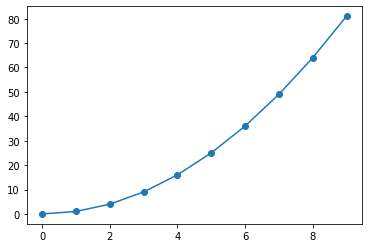

In [32]:
import matplotlib.pyplot as plt
plt.plot(*zip(*xy), 'o-');

### The container-unpacking asterisk

- So what are the asterisks above?
- A single asterisk (`*`) before a container
    - unpacks the container elements
    - **if** it occurs inside a container or function argument list
    - and unpacks keys only of the container is a dictionary
- Some examples

In [33]:
l = [11, 22, 33]
[*l, 44]

[11, 22, 33, 44]

In [36]:
(0, *l, 11)

(0, 11, 22, 33, 11)

In [37]:
print(*l, sep=' ; ')

11 ; 22 ; 33


In [38]:
print(11, 22, 33, sep=' ; ')

11 ; 22 ; 33


- What does this mean for our zipping and plotting?
- We need to provide every list that we want to zip over as one argument to `zip()`, as if we wrote
  ```python
  zip((1, 1), (2, 4), (3, 9), ...)
  ```
- `*xy` does precisely this unpacking for us, as we can see by the following calls to `print()`

##### ... without unpacking

In [39]:
print(xy, sep=' ; ')

[(0, 0), (1, 1), (2, 4), (3, 9), (4, 16), (5, 25), (6, 36), (7, 49), (8, 64), (9, 81)]


##### ... with unpacking

In [40]:
print(*xy, sep=' ; ')

(0, 0) ; (1, 1) ; (2, 4) ; (3, 9) ; (4, 16) ; (5, 25) ; (6, 36) ; (7, 49) ; (8, 64) ; (9, 81)


- Now consider the plot command
  ```python
  plt.plot(*zip(*xy), 'o-');
  ```
- `*xy` unpacks the original data for use by `zip()`, providing ten pairs of numbers
- `*zip()` unpacks the two lists returned by `zip()`, providing x- and y-values to `plot()`.

#### Zip: beware of missing data!

- `zip()` stops as soon as one of the containers provided as input runs out of data
- This can lead to difficult-to-find errors

In [41]:
list(zip([1, 2, 3, 4, 5], [10, 20, 30]))

[(1, 10), (2, 20), (3, 30)]

#### Dictionary unpacking

- Unpacking dictionaries with a single `*` gives the keys
- Unpacking dictionaries with with `**` gives key-value pairs
    - Only allowed insided dictionaries or argument lists
    - Inside argument lists, key-value pairs turn into `parameter=value`

In [78]:
d = {1: 2, 3: 4}
{**d, 5:6}

{1: 2, 3: 4, 5: 6}

In [79]:
prop = {'sep': ';', 'end': '###'}
print(1, 2, 3, **prop)

1;2;3###

In [42]:
print(1, 2, 3, sep=';', end='###')

1;2;3###

---
# NumPy arrays


- Python lists can contain "anything"
    - Flexible, but requires much space and time
- NumPy
    - Arrays containing a *fixed number* of elements of *the same data type*
    - Compact and efficient storage
    - Many mathematical operations can be applied to entire array

In [43]:
import numpy as np
import math

In [44]:
x = np.array([0, 1., 2, 3, 4, 5, 6])
3 * x + 2

array([ 2.,  5.,  8., 11., 14., 17., 20.])

## Array properties
- `ndim`: number of dimensions
- `size`: total number of elements
- `shape`: rows, columns, ...
- `dtype`: data type of elements
- `nbytes`: number of bytes occupied by data

In [45]:
print('x.ndim  :', x.ndim)
print('x.size  :', x.size)
print('x.shape :', x.shape)
print('x.dtype :', x.dtype)
print('x.nbytes:', x.nbytes)

x.ndim  : 1
x.size  : 7
x.shape : (7,)
x.dtype : float64
x.nbytes: 56


## Creating Arrays

### Numbers with fixed spacing: `linspace(a, b)`
- Creates array with 50 numbers from $a$ to $b$
- Both $a$ and $b$ er included
- Fixed interval between numbers: $(b-a)/49$
- You get an array with 100 numbers using `linspace(a, b, num=100)`

In [46]:
np.linspace(1, 50)

array([ 1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11., 12., 13.,
       14., 15., 16., 17., 18., 19., 20., 21., 22., 23., 24., 25., 26.,
       27., 28., 29., 30., 31., 32., 33., 34., 35., 36., 37., 38., 39.,
       40., 41., 42., 43., 44., 45., 46., 47., 48., 49., 50.])

In [47]:
np.linspace(0, 1, num=11)

array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ])

### Numbers with logarithmic spacing: `logspace(a, b)`

- Creates array with 50 numbers from $10^a$ to $10^b$
- Both $10^a$ and $10^b$ are included
- Logarithmic distance between numbers (fixed factor)

In [48]:
np.logspace(-1, 1, num=10)

array([ 0.1       ,  0.16681005,  0.27825594,  0.46415888,  0.77426368,
        1.29154967,  2.15443469,  3.59381366,  5.9948425 , 10.        ])

### Some other functions generating arrays

- take shape as first argument, data type is optional (default is `float`)
- `zeros()`: array of zeros of given size
- `ones()`: array of ones of given size
- `empty()`: array with uninitialized data
- `arange()`: similar to range, really useful only for arrays of integers
- `*_like()`: create array with same shape as argument

In [49]:
np.empty(10)

array([ 0.1       ,  0.16681005,  0.27825594,  0.46415888,  0.77426368,
        1.29154967,  2.15443469,  3.59381366,  5.9948425 , 10.        ])

- Note that the content if an array created with `empty()` is entirely unpredictable!

## Working with data in multiple dimension

- We will stick to one and two dimensions here
- Key concepts:
    - Operations are applied element-wise if both operands have same size
    - Otherwise, NumPy attempts to *broadcast*
        - The smaller operand is replicated as many times as necessary to create an array that matches the larger operand
        - The operation is then applied element-wise

### Example: array and array of same size

In [50]:
a = np.array([[1, 2], [3, 4], [5, 6]])
b = np.array([[10, 20], [30, 40], [50, 60]])
print(a)
print(b)
print(a+b)

[[1 2]
 [3 4]
 [5 6]]
[[10 20]
 [30 40]
 [50 60]]
[[11 22]
 [33 44]
 [55 66]]


In [51]:
a * b

array([[ 10,  40],
       [ 90, 160],
       [250, 360]])

- Note: **Element-wise multiplication, not matrix multiplication in mathematical sense**!

### Mathematical matrix-matrix/matrix-vector multiplication

- Available in Python 3.5 and later
- First factor must have as many columns as the second has rows
- `a` and `b` are both 3x2, so we get an error

In [52]:
a @ b

ValueError: matmul: Input operand 1 has a mismatch in its core dimension 0, with gufunc signature (n?,k),(k,m?)->(n?,m?) (size 3 is different from 2)

- We *transpose* `b` (flip about diagonal) to make it 2x3
- Now dimensions are compatible

In [53]:
a @ b.T

array([[ 50, 110, 170],
       [110, 250, 390],
       [170, 390, 610]])

### Example: array and scalar

In [54]:
a

array([[1, 2],
       [3, 4],
       [5, 6]])

In [55]:
a + 100

array([[101, 102],
       [103, 104],
       [105, 106]])

### Example: 2D- and 1D arrays

In [56]:
c = np.array([100, 200])
c

array([100, 200])

In [57]:
a + c

array([[101, 202],
       [103, 204],
       [105, 206]])

- `c` has been added to each row of `a`
- What happens for 3-element array?

In [58]:
d = np.array([10, 20, 30])
d

array([10, 20, 30])

In [59]:
a + d

ValueError: operands could not be broadcast together with shapes (3,2) (3,) 

- NumPy sees `d` as 1x3 vector, so shape does not fit
- Need to transpose first!
- But because `d` has only one dimension, transposing it has no effect

In [60]:
d.T

array([10, 20, 30])

- We need to define a two-dimensional array that has one row and three columns (note the extra brackets!)
- That can be transposed

In [61]:
dd = np.array([[10, 20, 30]])
dd

array([[10, 20, 30]])

In [62]:
dd.T

array([[10],
       [20],
       [30]])

In [63]:
a + dd.T

array([[11, 12],
       [23, 24],
       [35, 36]])

### Arrays vs Lists

- NumPy arrays differ in several ways from Python lists, especially
    - arrays have fixed size
    - all entries in an array have the same data type (exceptions apply)
- This makes arrays much more efficient in time and space than lists

#### Performance comparison

- List and array with 1.000.000 entries
- Compute sine of all elements

In [64]:
lx = list(range(0, 1000000))
ax = np.array(lx)

In [65]:
%timeit sinlx = [math.sin(x) for x in lx]

155 ms ± 1.14 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [66]:
%timeit sinax = np.sin(ax)

13.5 ms ± 79.7 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [68]:
sinlx = [math.sin(x) for x in lx]
sinax = np.sin(ax)
all(sinlx == sinax)

True

- NumPy is *significantly* faster than list comprehension
- This applies mainly when we apply NumPy functions to large arrays
- For scalars, `math` functions are usually faster than `numpy` functions

### Arrays slices are view: An important difference from lists

- See also [Copies and Views Tutorial](http://scipy-lectures.github.io/intro/numpy/array_object.html#copies-and-views)
- Array slices are so-called *views*:
    - If `a` is a Numpy array, and `b = a[m:n:s]`, then `b` is a *view* of array `a`
    - `a` and `b` are distinct objects (i.e., `id(a) != id(b)`)
    - `a` and `b` are both of type `numpy.ndarray`
    - `a` and `b` ***share the same underlying data***: `b` just restricts what we see of the data in `a`
    - Therefore, any change to data in `b` also affects data in `a`

In [69]:
a = np.array([1, 2, 3, 4, 5])
b = a[:3]
b[0] = 10
print(a)
print(b)

[10  2  3  4  5]
[10  2  3]


- In contrast, slicing a list gives a new list object

In [70]:
l = [1, 2, 3, 4, 5]
k = l[:3]
k[0] = 10
print(l)
print(k)

[1, 2, 3, 4, 5]
[10, 2, 3]


#### Summary: list slicing *vs* array slicing

- For a normal Python *list* `l`, `l[:]` is a **copy**  of the elements in `l`, i.e., a new list object, that can be manipulated without affecting `l`. 
- For an array `a`, `a[:]` is a **view** of `a` with the same underlying data as `a` and changing data through this view *will change* the data in `a`.

---
# Pandas series and dataframes


## Pandas 
- Powerful and widely popular package for data processing
- Developed by Wes McKinney since 2008
    - Originally geared towards applications in finance
- Resources
    - https://pandas.pydata.org
    - Chapter 12 in J.R. Johannsen's *Numerical Python*
    - [*Python for Data Analysis*](http://shop.oreilly.com/product/0636920023784.do) by Wes McKinney
- Focus on managing data
- Can be considered Python's answer to spreadsheets
- Similar to R's data frames
- Some support for data analysis and visualization

## Key concepts

- `Series`, roughly comparable to single columns in a spreadsheet
- `DataFrame`, roughly comparable to an entire table or spreadsheet
- Builds on NumPy, but
    - adds names to data
    - provides powerful high-level tools to work with tables

The remained of this lecture is based on Ch 12 of Johansson's *Numerical Python*.

Example data are result data at the district level of the Norwegian parliament elections 2021, downloaded from https://valgresultater.no/eksport-av-valgresultater?type=st&year=2021 on 30 September 2021.

## Series

- One-dimensional set of data
- Defined by passing an iterable of values

In [71]:
import pandas as pd

In [72]:
v = pd.Series([95609, 38779, 101439, 32584])
v

0     95609
1     38779
2    101439
3     32584
dtype: int64

- The left column shown here is the *index* of the series
    - Pandas automatically assigned index 0, 1, 2, 3 since we did not provide and index
- The right column are the *values* of the series
- We can access index and values:


In [73]:
v.index

RangeIndex(start=0, stop=4, step=1)

In [74]:
v.values

array([ 95609,  38779, 101439,  32584])

- Note that values are stored as NumPy arrays internally (Python packages build on top of each other)
- We can assign a new index to provide more information
- We can also assign a name

In [75]:
v.index = ['A', 'FRP', 'H', 'SP']
v.name = 'Votes'
v

A       95609
FRP     38779
H      101439
SP      32584
Name: Votes, dtype: int64

- Much more informative!
- We could have done it in one step

In [76]:
v = pd.Series([95609, 38779, 101439, 32584],
              index=['A', 'FRP', 'H', 'SP'],
              name='Votes')
v

A       95609
FRP     38779
H      101439
SP      32584
Name: Votes, dtype: int64

- The data in this series i now self-documenting through the series name and index
- We can now access data conveniently
    - We can always use dictionary notation

In [77]:
v['A']

95609

- If a name is a valid Python name, we can also look it up as an attribute

In [78]:
v.H

101439

- We can even look up several entries at once
- The result is then a new series

In [79]:
v[['A', 'H']]

A     95609
H    101439
Name: Votes, dtype: int64

- And we can slice
    - Note that the last matching index *is included*

In [80]:
v[:'H']

A       95609
FRP     38779
H      101439
Name: Votes, dtype: int64

- We can do some data analysis

In [81]:
v.count(), v.sum(), v.mean(), v.median()

(4, 268411, 67102.75, 67194.0)

- We can get an overview easily

In [82]:
v.describe()

count         4.000000
mean      67102.750000
std       36447.968708
min       32584.000000
25%       37230.250000
50%       67194.000000
75%       97066.500000
max      101439.000000
Name: Votes, dtype: float64

- We can also plot the data in various ways
- Note that we call `plot` as a method of the `Series`

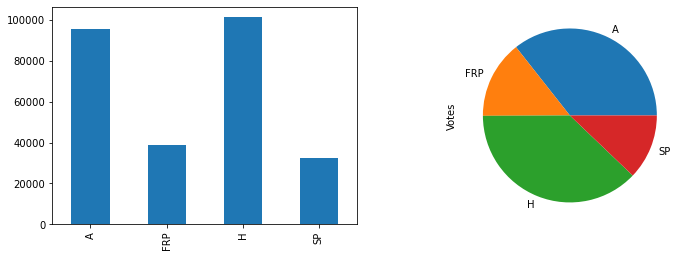

In [84]:
fig, axes = plt.subplots(1, 2, figsize=(12, 4))
v.plot(ax=axes[0], kind='bar')
v.plot(ax=axes[1], kind='pie');

## DataFrame

- Two-dimensional data structure
- Consists of one more Series
- Main workhorse of Pandas
- Allows us to represent and work with annotated (self-documenting) data in table form
- DataFrame vs Spreadsheet (Excel & Co)
    - both organise data in tables
    - both allow complex operation on tables
    - DataFrame contains *only data*—*operations are separate*
    - Spreadsheet *combines operations and data*: much more difficult to debug!

### Constructing a DataFrame

- Simplest construction from 2D array

In [86]:
df = pd.DataFrame([[87158, 'Oslo'], 
                   [89342, 'Oslo'], 
                   [95609, 'Akershus'],
                   [101439, 'Akershus']])
df

,0,1
0,87158,Oslo
1,89342,Oslo
2,95609,Akershus
3,101439,Akershus


- Jupyter neatly renders the DataFrame as table
- Pandas has automatically assigned numerical row index and column labels
- We can set them explictly post-construction or pass the information directly to the constructor

In [87]:
 df = pd.DataFrame([[87158, 'Oslo',], 
                    [89342, 'Oslo'], 
                    [95609, 'Akershus'],
                    [101439, 'Akershus']],
                   index=['A', 'H', 'A', 'H'],
                   columns=['Votes', 'District'])
df

,Votes,District
A,87158,Oslo
H,89342,Oslo
A,95609,Akershus
H,101439,Akershus


- We can also pass a dictionary with one entry per column

In [88]:
df = pd.DataFrame({'Votes': [87158, 89342, 95609, 101439],
                   'District': ['Oslo', 'Oslo', 'Akershus', 'Akershus']},
                  index=['A', 'H', 'A', 'H'])
df

,Votes,District
A,87158,Oslo
H,89342,Oslo
A,95609,Akershus
H,101439,Akershus


- Both approaches are not ideal, because we rely heavily on the fact that the three arrays are "in sync".
- Creating the DataFrame from records is safer

In [89]:
df = pd.DataFrame.from_records([{'District': 'Oslo', 'Party': 'A', 'Votes': 87158},
                                {'District': 'Oslo', 'Party': 'H', 'Votes': 89342},
                                {'District': 'Akershus', 'Party': 'A', 'Votes': 95609},
                                {'District': 'Akershus', 'Party': 'H', 'Votes': 101439}])
df

,District,Party,Votes
0,Oslo,A,87158
1,Oslo,H,89342
2,Akershus,A,95609
3,Akershus,H,101439


- We can then select one column as the index afterwards

In [90]:
df = df.set_index('Party')
df

,District,Votes
Party,,
A,Oslo,87158
H,Oslo,89342
A,Akershus,95609
H,Akershus,101439


- We can select individual columns

In [91]:
df.Votes

Party
A     87158
H     89342
A     95609
H    101439
Name: Votes, dtype: int64

In [92]:
df['Votes']

Party
A     87158
H     89342
A     95609
H    101439
Name: Votes, dtype: int64

- We can select rows using `loc`
    - looks like a method, but used with brackets
    - `ix` is used in Johansson's book but is deprecated today
    

In [93]:
df.loc['A']

,District,Votes
Party,,
A,Oslo,87158
A,Akershus,95609


- We can also combine row and column indexing

In [94]:
df.loc['A'].Votes

Party
A    87158
A    95609
Name: Votes, dtype: int64

In [95]:
df.loc['A', 'Votes']

Party
A    87158
A    95609
Name: Votes, dtype: int64

- We can obtain technical information about the dataframe

In [96]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4 entries, A to H
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   District  4 non-null      object
 1   Votes     4 non-null      int64 
dtypes: int64(1), object(1)
memory usage: 268.0+ bytes


- And we can get a summary 

In [97]:
df.describe()

,Votes
count,4.000000
mean,93387.000000
std,6453.279631
min,87158.000000
25%,88796.000000
50%,92475.500000
75%,97066.500000
max,101439.000000


- The summary does not contain the "District" column because that is not numerical

## Working with a large dataset: Complete election data

- Print the first few lines of the file

In [98]:
open('2021-09-30_party distribution_1_st_2021.csv', encoding='utf-8').readlines()[:10]

['Fylkenummer;Fylkenavn;Kommunenummer;Kommunenavn;Stemmekretsnummer;Stemmekretsnavn;Partikode;Partinavn;Oppslutning prosentvis;Antall stemmeberettigede;Antall forhåndsstemmer;Antall valgtingstemmer;Antall stemmer totalt;Endring % siste tilsvarende valg;Endring % siste ekvivalente valg;Antall mandater;Antall utjevningsmandater;\n',
 '01;Østfold;;;;;A;Arbeiderpartiet;30,47944;223945;24817;24528;49345;-1,58188;3,00272;3;0;\n',
 '01;Østfold;;;;;SV;SV - Sosialistisk Venstreparti;6,07798;223945;5525;4315;9840;1,69399;1,87632;1;1;\n',
 '01;Østfold;;;;;RØDT;Rødt;4,58195;223945;4258;3160;7418;2,44108;0,40159;0;0;\n',
 '01;Østfold;;;;;SP;Senterpartiet;14,11338;223945;10082;12767;22849;5,49005;-3,17734;2;0;\n',
 '01;Østfold;;;;;KRF;Kristelig Folkeparti;3,34412;223945;2576;2838;5414;-0,84722;-0,23466;0;0;\n',
 '01;Østfold;;;;;MDG;Miljøpartiet De Grønne;2,95375;223945;2974;1808;4782;0,34468;-3,04005;0;0;\n',
 '01;Østfold;;;;;V;Venstre;2,94695;223945;2408;2363;4771;0,5299;1,06177;0;0;\n',
 '01;Østfo

- We can read the file directly into a dataframe

In [99]:
vd = pd.read_csv('2021-09-30_party distribution_1_st_2021.csv', sep=';')

In [100]:
vd

,Fylkenummer,Fylkenavn,Kommunenummer,Kommunenavn,Stemmekretsnummer,Stemmekretsnavn,Partikode,Partinavn,Oppslutning prosentvis,Antall stemmeberettigede,Antall forhåndsstemmer,Antall valgtingstemmer,Antall stemmer totalt,Endring % siste tilsvarende valg,Endring % siste ekvivalente valg,Antall mandater,Antall utjevningsmandater,Unnamed: 17
0,1,Østfold,NaN,NaN,NaN,NaN,A,Arbeiderpartiet,"30,47944",223945,24817,24528,49345,"-1,58188","3,00272",3,0,NaN
1,1,Østfold,NaN,NaN,NaN,NaN,SV,SV - Sosialistisk Venstreparti,"6,07798",223945,5525,4315,9840,"1,69399","1,87632",1,1,NaN
2,1,Østfold,NaN,NaN,NaN,NaN,RØDT,Rødt,"4,58195",223945,4258,3160,7418,"2,44108","0,40159",0,0,NaN
3,1,Østfold,NaN,NaN,NaN,NaN,SP,Senterpartiet,"14,11338",223945,10082,12767,22849,"5,49005","-3,17734",2,0,NaN
4,1,Østfold,NaN,NaN,NaN,NaN,KRF,Kristelig Folkeparti,"3,34412",223945,2576,2838,5414,"-0,84722","-0,23466",0,0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
375,20,Finnmark Finnmárku,NaN,NaN,NaN,NaN,KRISTNE,Partiet De Kristne,"0,354",54608,71,67,138,"-0,00838","-0,07736",0,0,NaN
376,20,Finnmark Finnmárku,NaN,NaN,NaN,NaN,LIBS,Liberalistene,"0,17957",54608,46,24,70,"-0,04146","-0,16308",0,0,NaN
377,20,Finnmark Finnmárku,NaN,NaN,NaN,NaN,PS,Partiet Sentrum,"0,177",54608,44,25,69,"0,177","0,177",0,0,NaN
378,20,Finnmark Finnmárku,NaN,NaN,NaN,NaN,BLANKE,Blanke,"0,81061",54608,172,144,316,"-0,15832","-2,78715",0,0,NaN


- We see `NaN` (not-a-number) values: Pandas' way of marking missing data
    - Data is missing here because the data file is at the district (Fylke) level
- We can look at all column names

In [101]:
vd.columns

Index(['Fylkenummer', 'Fylkenavn', 'Kommunenummer', 'Kommunenavn',
       'Stemmekretsnummer', 'Stemmekretsnavn', 'Partikode', 'Partinavn',
       'Oppslutning prosentvis', 'Antall stemmeberettigede',
       'Antall forhåndsstemmer', 'Antall valgtingstemmer',
       'Antall stemmer totalt', 'Endring % siste tilsvarende valg',
       'Endring % siste ekvivalente valg', 'Antall mandater',
       'Antall utjevningsmandater', 'Unnamed: 17'],
      dtype='object')

- We select columns we want to work with

In [102]:
vd = vd[['Fylkenavn', 'Partikode', 'Antall forhåndsstemmer', 
         'Antall valgtingstemmer', 'Antall stemmer totalt']]

- And we rename those columns to shorter, English names
- We use a dictionary to map old names to new names explicitly for robustness

In [103]:
vd = vd.rename({'Fylkenavn': 'District',
                'Partikode': 'Party',
                'Antall forhåndsstemmer': 'EarlyVotes', 
                'Antall valgtingstemmer': 'EDayVotes',
                'Antall stemmer totalt': 'Votes'},
                axis=1)
vd.head()

,District,Party,EarlyVotes,EDayVotes,Votes
0,Østfold,A,24817,24528,49345
1,Østfold,SV,5525,4315,9840
2,Østfold,RØDT,4258,3160,7418
3,Østfold,SP,10082,12767,22849
4,Østfold,KRF,2576,2838,5414


- We can perform one consistency check

In [104]:
all(vd.EarlyVotes + vd.EDayVotes == vd.Votes)

True

- To keep the following examples less cluttered, we only keep data for parties who got at least 100.000 votes nationwide.
- The way I select this data is a bit complicated, we will return to it later.

In [105]:
bp = vd.groupby('Party').Votes.sum() > 100000
vd = vd.set_index('Party').loc[bp.loc[bp].index].reset_index()

### Exploring the data

In [106]:
vd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 171 entries, 0 to 170
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Party       171 non-null    object
 1   District    171 non-null    object
 2   EarlyVotes  171 non-null    int64 
 3   EDayVotes   171 non-null    int64 
 4   Votes       171 non-null    int64 
dtypes: int64(3), object(2)
memory usage: 6.8+ KB


In [107]:
vd.describe()

,EarlyVotes,EDayVotes,Votes
count,171.000000,171.000000,171.000000
mean,9727.684211,7100.169591,16827.853801
std,11115.007252,7678.221370,18634.408765
min,349.000000,215.000000,564.000000
25%,2566.500000,1551.000000,4289.000000
50%,5853.000000,4315.000000,9696.000000
75%,13174.500000,10116.500000,23595.500000
max,64224.000000,40263.000000,101439.000000


- Sort in decending order of votes

In [108]:
vd.sort_values(by='Votes', ascending=False).head()

,Party,District,EarlyVotes,EDayVotes,Votes
39,H,Akershus,64224,37215,101439
1,A,Akershus,55346,40263,95609
40,H,Oslo,55643,33699,89342
2,A,Oslo,50857,36301,87158
49,H,Hordaland,45860,28422,74282


#### Hierarchical indexing

- We can create an index with several components
- Entries are then grouped
- We also sort by district

In [109]:
vd_dp = vd.set_index(['District', 'Party']).sort_index(level=0)
vd_dp.head(40)

EarlyVotes  EDayVotes   Votes
District           Party                               
Akershus           A           55346      40263   95609
                   FRP         21035      17744   38779
                   H           64224      37215  101439
                   KRF          4388       3192    7580
                   MDG         12362       5099   17461
                   RØDT         9124       5448   14572
                   SP          17296      15288   32584
                   SV          15889       9351   25240
                   V           15224      10169   25393
Aust-Agder         A            8454       7693   16147
                   FRP          3845       4883    8728
                   H            7331       5974   13305
                   KRF          3073       2676    5749
                   MDG          1333        643    1976
                   RØDT         1498        958    2456
                   SP           4107       4800    8907
                   SV           2248       1396    3644
                   V            1178        958    2136
Buskerud           A           25258      15317   40575
                   FRP          9651       7858   17509
                   H           19806      11738   31544
                   KRF          2008       1311    3319
                   MDG          3065       1186    4251
                   RØDT         3373       1568    4941
                   SP          12690      10378   23068
                   SV           5469       2593    8062
                   V            3149       2058    5207
Finnmark Finnmárku A            7253       4975   12228
                   FRP          2289       1931    4220
                   H            1644       1020    2664
                   KRF           377        271     648
                   MDG           665        227     892
                   RØDT         1297        662    1959
                   SP           4033       3124    7157
                   SV           1541        874    2415
                   V             349        215     564
Hedmark            A           20746      17390   38136
                   FRP          4393       5303    9696
                   H            6657       5534   12191
                   KRF           966        910    1876

- Look up one district

In [110]:
vd_dp.loc['Rogaland']

,EarlyVotes,EDayVotes,Votes
Party,,,
A,33085,24884,57969
FRP,23656,19726,43382
H,37182,24810,61992
KRF,11890,8969,20859
MDG,4297,1855,6152
RØDT,6036,3584,9620
SP,13879,13076,26955
SV,8466,4795,13261
V,5254,3852,9106


- Look up the result of a specify party in a specific district with hierarchical index
    - Argument *must* be *tuple*, not list

In [111]:
vd_dp.loc[('Akershus', 'MDG')]

EarlyVotes    12362
EDayVotes      5099
Votes         17461
Name: (Akershus, MDG), dtype: int64

#### Multiple levels of columns

- We would like to plot the distribution of votes to parties by district
- For this, we need a table with
    - one row per district
    - one column per party
- `unstack()` turns the "inner" index level to a new column level

In [112]:
vd_dp_us = vd_dp.unstack()
vd_dp_us.head()

EarlyVotes                                                 \
Party                       A    FRP      H   KRF    MDG  RØDT     SP     SV   
District                                                                       
Akershus                55346  21035  64224  4388  12362  9124  17296  15889   
Aust-Agder               8454   3845   7331  3073   1333  1498   4107   2248   
Buskerud                25258   9651  19806  2008   3065  3373  12690   5469   
Finnmark Finnmárku       7253   2289   1644   377    665  1297   4033   1541   
Hedmark                 20746   4393   6657   966   1652  2342  15307   4686   

                          EDayVotes  ...         Votes                       \
Party                   V         A  ...      V      A    FRP       H   KRF   
District                             ...                                      
Akershus            15224     40263  ...  10169  95609  38779  101439  7580   
Aust-Agder           1178      7693  ...    958  16147   8728   13305  5749   
Buskerud             3149     15317  ...   2058  40575  17509   31544  3319   
Finnmark Finnmárku    349      4975  ...    215  12228   4220    2664   648   
Hedmark              1437     17390  ...   1205  38136   9696   12191  1876   

                                                       
Party                 MDG   RØDT     SP     SV      V  
District                                               
Akershus            17461  14572  32584  25240  25393  
Aust-Agder           1976   2456   8907   3644   2136  
Buskerud             4251   4941  23068   8062   5207  
Finnmark Finnmárku    892   1959   7157   2415    564  
Hedmark              2382   3876  32286   7902   2642  

[5 rows x 27 columns]

- This gives us a table with the number of votes for each party in each district

In [113]:
vd_dp_us.Votes

Party,A,FRP,H,KRF,MDG,RØDT,SP,SV,V
District,,,,,,,,,
Akershus,95609,38779,101439,7580,17461,14572,32584,25240,25393
Aust-Agder,16147,8728,13305,5749,1976,2456,8907,3644,2136
Buskerud,40575,17509,31544,3319,4251,4941,23068,8062,5207
Finnmark Finnmárku,12228,4220,2664,648,892,1959,7157,2415,564
Hedmark,38136,9696,12191,1876,2382,3876,32286,7902,2642
Hordaland,68945,38352,74282,14724,11940,14150,29981,26901,13163
Møre og Romsdal,29928,32746,24123,7905,3697,4933,25938,9341,4364
Nord-Trøndelag,25730,6146,8121,1726,1424,3035,22089,4389,1557
Nordland,38611,16338,20532,2637,3138,7273,28465,9620,3342


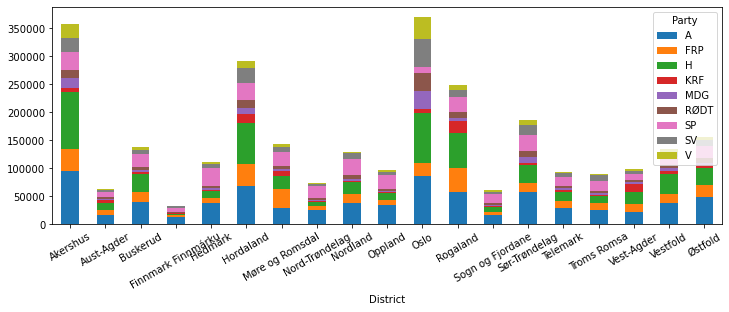

In [115]:
vd_dp_us.Votes.plot(kind='bar', stacked=True, figsize=(12, 4), rot=30);

- By unstacking differently, we can also see the distribution across districts for each party

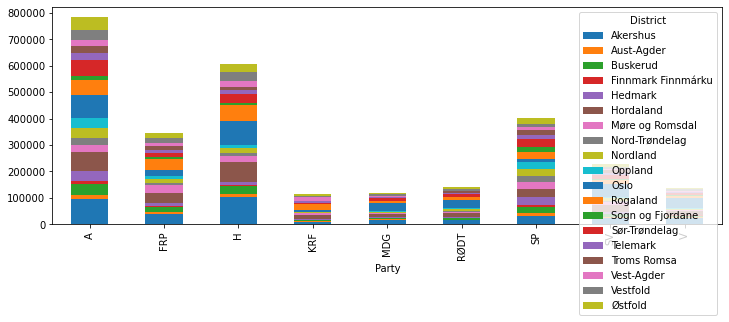

In [116]:
vd_dp.unstack(level=0).Votes.plot(kind='bar', stacked=True, figsize=(12, 4));

### Grouping

- Using grouping, we can aggregate data across a group
- Here we will aggregate the number of votes by party
- We first apply `groupby()` to perform the grouping, then an aggregation operation
- See also https://pandas.pydata.org/pandas-docs/stable/groupby.html

In [117]:
party_votes = vd.groupby('Party').sum()
party_votes

,EarlyVotes,EDayVotes,Votes
Party,,,
A,448001,335393,783394
FRP,182398,164076,346474
H,364352,242964,607316
KRF,64604,48740,113344
MDG,82235,35412,117647
RØDT,90313,50618,140931
SP,205534,197427,402961
SV,145819,82244,228063
V,80178,57255,137433


- We can compute the share of the total votes for each party and the percentage of early votes

In [118]:
total_votes = party_votes.Votes.sum()
party_votes['% Votes'] = party_votes.Votes / total_votes * 100
party_votes['% Early'] = party_votes.EarlyVotes / party_votes.Votes * 100

- We are most interested in the larger parties, so we sort
    - Here, we sort the dataframe in place instead of returning a new one

In [119]:
party_votes.sort_values(by='Votes', ascending=False, inplace=True)
party_votes.head()

,EarlyVotes,EDayVotes,Votes,% Votes,% Early
Party,,,,,
A,448001,335393,783394,27.224217,57.187188
H,364352,242964,607316,21.105220,59.993809
SP,205534,197427,402961,14.003551,51.005929
FRP,182398,164076,346474,12.040536,52.644066
SV,145819,82244,228063,7.925561,63.938035


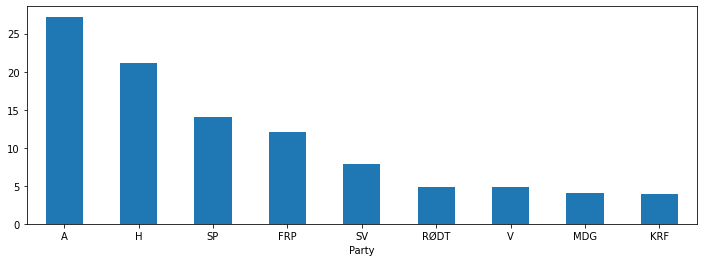

In [120]:
party_votes['% Votes'].plot(kind='bar', figsize=(12, 4), rot=0);

- `rot=0` turns the bar label horizonal
- We also look at the share of early voters

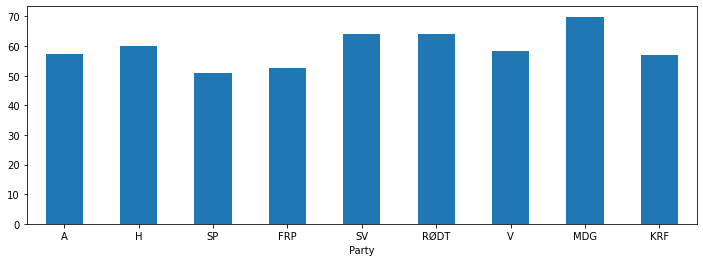

In [121]:
party_votes['% Early'].plot(kind='bar', figsize=(12, 4), rot=0);